# Main Course Week 5: Exercises

**Comments:** The two exercises were pretty cool, seeing how machine learning works and can be used with scikit-learn. If the class were longer, would have liked some more exercises, but will definitely be using this book, the videos, and exercises over break to learn more about machine learning. Thanks Paul for a great class!



## Ch. 15 Exercises
---

### 15.5 Using TSNE to Visualize the Digits Dataset in 3D

Create a 3D scatter plot using TSNE and Matplotlib's Axes3D.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=11)

In [3]:
reduced_data = tsne.fit_transform(digits.data)

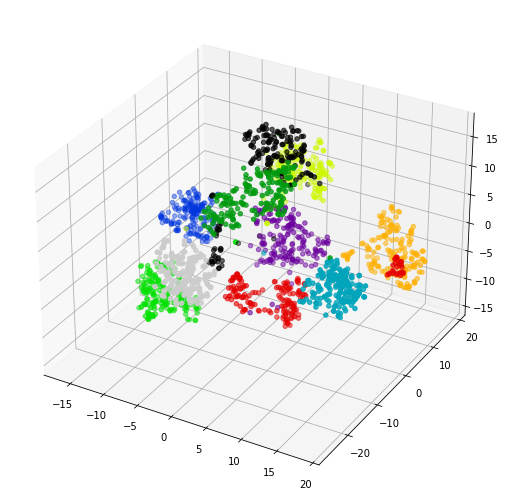

In [4]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(9,9))

axes = figure.add_subplot(111, projection='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1], 
                   zs=reduced_data[:, 2], c=digits.target,
                   cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

### 15.17 Binary Classification with the Breast Cancer Dataset

In [5]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

In [7]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()

gauss.fit(X=X_train, y=y_train)

predicted = gauss.predict(X=X_test)

expected = y_test

predicted[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [8]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [9]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong

[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]

In [10]:
print(f'{gauss.score(X_test, y_test):.2%}')

95.10%


In [11]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion

array([[44,  6],
       [ 1, 92]])

In [12]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

confusion_df

,0,1
0,44,6
1,1,92


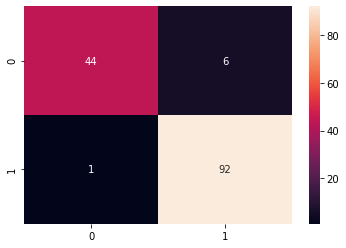

In [13]:
import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True)

In [14]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=gauss, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [16]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [18]:
print(f'Mean Accuracy: {scores.mean():.2%}')

print(f'Accuracy Standard Deviation: {scores.std():.2%}')

Mean Accuracy: 93.85%
Accuracy Standard Deviation: 2.75%


In [19]:
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

estimators = {
    'GaussianNB': gauss,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'),
    'LogisticRegression': LogisticRegression(max_iter=10000)
}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
                            X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + 
         f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
  LogisticRegression: mean accuracy=95.26%; standard deviation=2.72%
